In [17]:
import numpy as np #importing the numpy 
import pandas as pd #importing the pandas
import matplotlib.pyplot as plt #importing the matplot
import seaborn as sns #importing the seaborn
from collections import Counter

In [18]:
# define dataset
df=pd.read_csv('ml360datasets/Movie_classification.csv')
df1=pd.read_csv('ml360datasets/loan_classification.csv')

def null_replace(df): #replacing the null values
    for col in df.columns:
        if (df[col].dtypes == "object"): # checking the datatype
            df[col]=df[col].fillna(df[col].mode()[0]) #replacing the null values for catgeory column
        else:
            df[col]=df[col].fillna(df[col].mean()) # replacing the null values for numerical columns
    return df

df=null_replace(df) #using the fun for movie classification

df1=null_replace(df1)  #using the fun for loan classification

# Movie

In [19]:
# summarize class distribution
(df['Start_Tech_Oscar'].value_counts()/len(df))*100

1    54.545455
0    45.454545
Name: Start_Tech_Oscar, dtype: float64

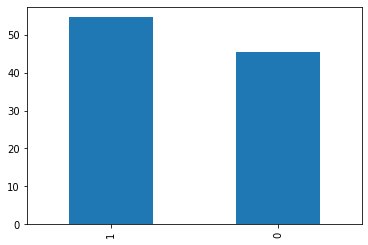

In [20]:
((df['Start_Tech_Oscar'].value_counts()/len(df))*100).plot(kind='bar')
plt.show() # summarize class distribution in bar plot

In [21]:
def label_encoder(df):
    from sklearn.preprocessing import LabelEncoder #doing the labelencoder for category columns
    le = LabelEncoder()
    for col in df.columns:
        if (df[col].dtypes == "object"):
            df[col] = df[col].astype(str)
            df[col] = le.fit_transform(df[col])
    return df

In [22]:
df=label_encoder(df) #appling the fun of label encoder

In [23]:
X=df.drop('Start_Tech_Oscar',axis=1) #defining the X matrix
Y=df['Start_Tech_Oscar']  #defining the y matrix

In [24]:
#Importing the metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score,f1_score,auc

# SMOTE

In [25]:
from imblearn.over_sampling import SMOTE #importing the SMOTE
oversample = SMOTE() #giving a variable to SMOTE Fun
X_smote, y_smote = oversample.fit_resample(X, Y) # fiting the X and y  in smote 
print(Counter(y_smote)) #checking the target classes count

Counter({1: 276, 0: 276})


In [26]:
from sklearn.model_selection import train_test_split  #importing the train and test split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=.3,random_state=42) #defining train and test

In [27]:
from sklearn.ensemble import RandomForestClassifier #importing random forest
rf=RandomForestClassifier(random_state=42) #giving variable to random forest
rf.fit(X_train, y_train)  #fiting X train and y train to randomforest
y_pred_test= rf.predict(X_test) #predicting the Test features
y_pred_train= rf.predict(X_train) #predicting the Train features

In [28]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test)) #printing the confusion matrix for y test
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train)) #printing the confusion matrix for y train

Test Confusion  Matrix :  
 [[55 32]
 [23 56]]


Train Confusion  Matrix :  
 [[189   0]
 [  0 197]]


In [29]:
#printing the classification matrix for y test
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test)) 
#printing the classification matrix for y train
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        87
           1       0.64      0.71      0.67        79

    accuracy                           0.67       166
   macro avg       0.67      0.67      0.67       166
weighted avg       0.67      0.67      0.67       166

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       197

    accuracy                           1.00       386
   macro avg       1.00      1.00      1.00       386
weighted avg       1.00      1.00      1.00       386



In [30]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ") #accuracy for train
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test)) #accuracy for test
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ") #precision for train
print('Test Precision : ', precision_score(y_test,y_pred_test))   #precision for test
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ") #recall for train
print('Test Recall : ', recall_score(y_test,y_pred_test))  #recall for test

Train Accuracy :  1.0    Test Accuracy :  0.6686746987951807
Train Precision :  1.0   Test Precision :  0.6363636363636364
Train Recall :  1.0      Test Recall :  0.7088607594936709


# TomekLinks

In [31]:
from imblearn.under_sampling import TomekLinks #importing Tomeklinks
undersample=TomekLinks()  #giving variable to Tomek funvtion
X_tomek, y_tomek = undersample.fit_resample(X, Y) #fiting the X and y matrix for resampling
print(Counter(y_tomek))  #checking the target classes count

Counter({0: 230, 1: 208})


In [32]:
from sklearn.model_selection import train_test_split  #importing the train and test split
X_train,X_test,y_train,y_test=train_test_split(X_tomek,y_tomek,test_size=.3,random_state=42) #defining train and test

In [33]:
from sklearn.ensemble import RandomForestClassifier #importing random forest
rf=RandomForestClassifier(random_state=42)    #giving variable to random forest
rf.fit(X_train, y_train)  #fiting X train and y train to randomforest
y_pred_test= rf.predict(X_test)  #predicting the Test features
y_pred_train = rf.predict(X_train)  #predicting the Train features

In [34]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test)) #printing the confusion matrix for y test
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train))  #printing the confusion matrix for y train

Test Confusion  Matrix :  
 [[51 24]
 [27 30]]


Train Confusion  Matrix :  
 [[155   0]
 [  0 151]]


In [35]:
#printing the classification matrix for y test
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
#printing the classification matrix for y train
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        75
           1       0.56      0.53      0.54        57

    accuracy                           0.61       132
   macro avg       0.60      0.60      0.60       132
weighted avg       0.61      0.61      0.61       132

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       151

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306



In [36]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")  #accuracy for train
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))  #accuracy for test
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")  #precision for train
print('Test Precision : ', precision_score(y_test,y_pred_test))  #precision for test
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")  #recall for train
print('Test Recall : ', recall_score(y_test,y_pred_test))  #recall for test

Train Accuracy :  1.0    Test Accuracy :  0.6136363636363636
Train Precision :  1.0   Test Precision :  0.5555555555555556
Train Recall :  1.0      Test Recall :  0.5263157894736842


# ENN

In [37]:
from imblearn.under_sampling import EditedNearestNeighbours #importing ENN
undersample=EditedNearestNeighbours() #giving the variable to ENN
X_enn, y_enn = undersample.fit_resample(X, Y)  #fiting the X and y matrix for resampling
print(Counter(y_enn)) #checking the target classes count

Counter({0: 230, 1: 72})


In [38]:
from sklearn.model_selection import train_test_split  #importing the train and test split
X_train,X_test,y_train,y_test=train_test_split(X_enn,y_enn,test_size=.3,random_state=42) #defining train and test

In [39]:
from sklearn.ensemble import RandomForestClassifier  #importing random forest
rf=RandomForestClassifier(random_state=42)    #giving variable to random forest
rf.fit(X_train, y_train)  #fiting X train and y train to randomforest
y_pred_test= rf.predict(X_test)  #predicting the Test features
y_pred_train = rf.predict(X_train)  #predicting the Train features

In [40]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test)) #printing the confusion matrix for y test
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train)) #printing the confusion matrix for y train

Test Confusion  Matrix :  
 [[66  1]
 [13 11]]


Train Confusion  Matrix :  
 [[163   0]
 [  0  48]]


In [41]:
#printing the classification matrix for y test
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
#printing the classification matrix for y train
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.84      0.99      0.90        67
           1       0.92      0.46      0.61        24

    accuracy                           0.85        91
   macro avg       0.88      0.72      0.76        91
weighted avg       0.86      0.85      0.83        91

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        48

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [42]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")  #accuracy for train
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))  #accuracy for test
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")  #precision for train
print('Test Precision : ', precision_score(y_test,y_pred_test))  #precision for test
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")  #recall for train
print('Test Recall : ', recall_score(y_test,y_pred_test))  #recall for test

Train Accuracy :  1.0    Test Accuracy :  0.8461538461538461
Train Precision :  1.0   Test Precision :  0.9166666666666666
Train Recall :  1.0      Test Recall :  0.4583333333333333


# Combine Oversampling and UnderSampling

## SMOTETomek

In [43]:
from imblearn.combine import SMOTETomek #importing SMOTETOMEK
smk = SMOTETomek() #giving a variable to smotetomek fun
X_stomek,y_stomek=smk.fit_resample(X,Y) #fiting the X and y matrix for resampling
print(Counter(y_stomek))  #checking the target classes count

Counter({1: 216, 0: 216})


In [44]:
from sklearn.model_selection import train_test_split    #importing the train and test split
X_train,X_test,y_train,y_test=train_test_split(X_stomek,y_stomek,test_size=.3,random_state=42) #defining train and test

In [45]:
from sklearn.ensemble import RandomForestClassifier  #importing random forest
rf=RandomForestClassifier(random_state=42)    #giving variable to random forest
rf.fit(X_train, y_train)  #fiting X train and y train to randomforest
y_pred_test= rf.predict(X_test)  #predicting the Test features
y_pred_train = rf.predict(X_train)  #predicting the Train features

In [46]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test)) #printing the confusion matrix for y test
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train)) #printing the confusion matrix for y train

Test Confusion  Matrix :  
 [[52 13]
 [24 41]]


Train Confusion  Matrix :  
 [[151   0]
 [  0 151]]


In [47]:
#printing the classification matrix for y test
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
#printing the classification matrix for y train
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.68      0.80      0.74        65
           1       0.76      0.63      0.69        65

    accuracy                           0.72       130
   macro avg       0.72      0.72      0.71       130
weighted avg       0.72      0.72      0.71       130

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       151

    accuracy                           1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



In [48]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")  #accuracy for train
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))  #accuracy for test
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")  #precision for train
print('Test Precision : ', precision_score(y_test,y_pred_test))  #precision for test
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")  #recall for train
print('Test Recall : ', recall_score(y_test,y_pred_test))  #recall for test

Train Accuracy :  1.0    Test Accuracy :  0.7153846153846154
Train Precision :  1.0   Test Precision :  0.7592592592592593
Train Recall :  1.0      Test Recall :  0.6307692307692307


## SMOTEENN

In [49]:
from imblearn.combine import SMOTEENN  #importing the SMOTEENN
smk = SMOTEENN() #giving variable to SMOTEENN fun
X_senn,y_senn=smk.fit_resample(X,Y)  #fiting the X and y matrix for resampling
print(Counter(y_senn))  #checking the target classes count

Counter({1: 71, 0: 50})


In [50]:
from sklearn.model_selection import train_test_split   #importing the train and test split
X_train,X_test,y_train,y_test=train_test_split(X_senn,y_senn,test_size=.3,random_state=42)  #defining train and test

In [51]:
from sklearn.ensemble import RandomForestClassifier  #importing random forest
rf=RandomForestClassifier(random_state=42)    #giving variable to random forest
rf.fit(X_train, y_train)  #fiting X train and y train to randomforest
y_pred_test= rf.predict(X_test)  #predicting the Test features
y_pred_train = rf.predict(X_train)  #predicting the Train features

In [52]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test)) #printing the confusion matrix for y test
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train)) #printing the confusion matrix for y train

Test Confusion  Matrix :  
 [[14  4]
 [ 2 17]]


Train Confusion  Matrix :  
 [[32  0]
 [ 0 52]]


In [53]:
#printing the classification matrix for y test
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
#printing the classification matrix for y train
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.81      0.89      0.85        19

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        52

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [54]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")  #accuracy for train
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))  #accuracy for test
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")  #precision for train
print('Test Precision : ', precision_score(y_test,y_pred_test))  #precision for test
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")  #recall for train
print('Test Recall : ', recall_score(y_test,y_pred_test))  #recall for test

Train Accuracy :  1.0    Test Accuracy :  0.8378378378378378
Train Precision :  1.0   Test Precision :  0.8095238095238095
Train Recall :  1.0      Test Recall :  0.8947368421052632


# Loan

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score,f1_score,auc

In [55]:
# summarize class distribution
(df1['Loan_Status'].value_counts()/len(df1))*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

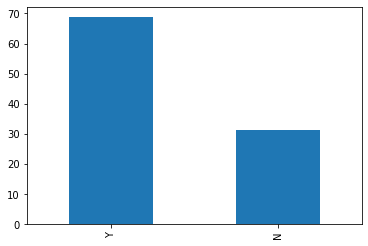

In [56]:
((df1['Loan_Status'].value_counts()/len(df1))*100).plot(kind='bar')
plt.show()

In [57]:
def label_encoder(df1):
    from sklearn.preprocessing import LabelEncoder #doing the labelencoder for category columns
    le = LabelEncoder()
    for col in df1.columns:
        if (df1[col].dtypes == "object"):
            df1[col] = df1[col].astype(str)
            df1[col] = le.fit_transform(df1[col])
    return df1

In [58]:
df1=label_encoder(df1)

In [59]:
X=df1.drop('Loan_Status',axis=1)
Y=df1['Loan_Status']

# SMOTE

In [61]:
#it needs to convert categorical to numerical featuers
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, Y)
print(Counter(y_smote))

Counter({1: 422, 0: 422})


In [62]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=.3,random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_test= rf.predict(X_test)
y_pred_train= rf.predict(X_train)

In [65]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test))
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train))

Test Confusion  Matrix :  
 [[ 96  40]
 [ 11 107]]


Train Confusion  Matrix :  
 [[286   0]
 [  0 304]]


In [66]:
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       136
           1       0.73      0.91      0.81       118

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.80       254
weighted avg       0.82      0.80      0.80       254

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       304

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590



In [67]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")
print('Test Precision : ', precision_score(y_test,y_pred_test))
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")
print('Test Recall : ', recall_score(y_test,y_pred_test))

Train Accuracy :  1.0    Test Accuracy :  0.7992125984251969
Train Precision :  1.0   Test Precision :  0.7278911564625851
Train Recall :  1.0      Test Recall :  0.9067796610169492


# TomekLinks

In [69]:
from imblearn.under_sampling import TomekLinks
undersample=TomekLinks()
X_tomek, y_tomek = undersample.fit_resample(X, Y)
print(Counter(y_tomek))

Counter({1: 341, 0: 192})


In [70]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_tomek,y_tomek,test_size=.3,random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_test= rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [73]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test))
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train))

Test Confusion  Matrix :  
 [[26 25]
 [11 98]]


Train Confusion  Matrix :  
 [[141   0]
 [  0 232]]


In [74]:
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.70      0.51      0.59        51
           1       0.80      0.90      0.84       109

    accuracy                           0.78       160
   macro avg       0.75      0.70      0.72       160
weighted avg       0.77      0.78      0.76       160

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       232

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



In [75]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")
print('Test Precision : ', precision_score(y_test,y_pred_test))
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")
print('Test Recall : ', recall_score(y_test,y_pred_test))

Train Accuracy :  1.0    Test Accuracy :  0.775
Train Precision :  1.0   Test Precision :  0.7967479674796748
Train Recall :  1.0      Test Recall :  0.8990825688073395


# ENN

In [77]:
from imblearn.under_sampling import EditedNearestNeighbours
undersample=EditedNearestNeighbours()
X_enn, y_enn = undersample.fit_resample(X, Y)
print(Counter(y_enn))

Counter({0: 192, 1: 149})


In [78]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_enn,y_enn,test_size=.3,random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_test= rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [81]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test))
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train))

Test Confusion  Matrix :  
 [[41 18]
 [ 8 36]]


Train Confusion  Matrix :  
 [[133   0]
 [  0 105]]


In [82]:
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.84      0.69      0.76        59
           1       0.67      0.82      0.73        44

    accuracy                           0.75       103
   macro avg       0.75      0.76      0.75       103
weighted avg       0.76      0.75      0.75       103

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       105

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238



In [83]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")
print('Test Precision : ', precision_score(y_test,y_pred_test))
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")
print('Test Recall : ', recall_score(y_test,y_pred_test))

Train Accuracy :  1.0    Test Accuracy :  0.7475728155339806
Train Precision :  1.0   Test Precision :  0.6666666666666666
Train Recall :  1.0      Test Recall :  0.8181818181818182


# Combine Oversampling and UnderSampling

## SMOTETomek

In [85]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_stomek,y_stomek=smk.fit_resample(X,Y)
print(Counter(y_stomek))

Counter({1: 368, 0: 368})


In [86]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_stomek,y_stomek,test_size=.3,random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_test= rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [89]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test))
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train))

Test Confusion  Matrix :  
 [[95 16]
 [12 98]]


Train Confusion  Matrix :  
 [[257   0]
 [  0 258]]


In [90]:
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       111
           1       0.86      0.89      0.88       110

    accuracy                           0.87       221
   macro avg       0.87      0.87      0.87       221
weighted avg       0.87      0.87      0.87       221

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       258

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [91]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")
print('Test Precision : ', precision_score(y_test,y_pred_test))
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")
print('Test Recall : ', recall_score(y_test,y_pred_test))

Train Accuracy :  1.0    Test Accuracy :  0.8733031674208145
Train Precision :  1.0   Test Precision :  0.8596491228070176
Train Recall :  1.0      Test Recall :  0.8909090909090909


## SMOTEENN

In [93]:
from imblearn.combine import SMOTEENN
smk = SMOTEENN()
X_senn,y_senn=smk.fit_resample(X,Y)
print(Counter(y_senn))

Counter({0: 168, 1: 125})


In [94]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_senn,y_senn,test_size=.3,random_state=42)

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_test= rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [97]:
print('Test Confusion  Matrix : ','\n' ,confusion_matrix(y_test,y_pred_test))
print('\n')
print('Train Confusion  Matrix : ','\n',confusion_matrix(y_train,y_pred_train))

Test Confusion  Matrix :  
 [[52  4]
 [ 4 28]]


Train Confusion  Matrix :  
 [[112   0]
 [  0  93]]


In [98]:
print('Test Classification Report : ' ,'\n',classification_report(y_test,y_pred_test))
print('Train Classification Report : ' ,'\n',classification_report(y_train,y_pred_train))

Test Classification Report :  
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.88      0.88      0.88        32

    accuracy                           0.91        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88

Train Classification Report :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        93

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [99]:
print('Train Accuracy : ', accuracy_score(y_train,y_pred_train),end="    ")
print('Test Accuracy : ', accuracy_score(y_test,y_pred_test))
print('Train Precision : ', precision_score(y_train,y_pred_train),end="   ")
print('Test Precision : ', precision_score(y_test,y_pred_test))
print('Train Recall : ', recall_score(y_train,y_pred_train),end="      ")
print('Test Recall : ', recall_score(y_test,y_pred_test))

Train Accuracy :  1.0    Test Accuracy :  0.9090909090909091
Train Precision :  1.0   Test Precision :  0.875
Train Recall :  1.0      Test Recall :  0.875
